In [12]:
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv('Carseats_Clean.csv')

In [6]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,0,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,0,1
4,4.15,141,64,3,340,128,38,13,1,0,1,0,0


In [19]:
df_cls = df
df_cls['Sales_class'] = ''

przedzialy = {}

df_cls['Sales_class'] = np.where(df_cls['Sales'] < df_cls['Sales'].quantile(0.333), 0, np.where(df_cls['Sales'] < df_cls['Sales'].quantile(0.666), 1, 2))

df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Sales_class
0,9.50,138,73,11,276,120,42,17,1,1,1,0,0,2
1,11.22,111,48,16,260,83,65,10,1,1,0,1,0,2
2,10.06,113,35,10,269,80,59,12,1,1,0,0,1,2
3,7.40,117,100,4,466,97,55,14,1,1,0,0,1,1
4,4.15,141,64,3,340,128,38,13,1,0,1,0,0,0


In [26]:
X = df.drop(['Sales','Sales_class'], axis=1).values.astype('float')
y = df['Sales'].values.astype('float') 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
scaler = MinMaxScaler()
scaler.fit(X_train)
norm_x_train = scaler.transform(X_train)
norm_x_test = scaler.transform(X_test)

In [28]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X, y)

C:\Users\Agusia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
rf_regressor.score(X, y)

0.9392157914158811

sprawdzenie

In [30]:
rf_regressor.predict(X[:5])

array([ 9.447, 11.412,  9.439,  7.261,  4.508])

In [31]:
rf_regressor.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1874457452, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1678629859, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1625753292, splitter='best'),
 DecisionTreeRegres

In [37]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train) #dopasowujemy do danych treningowych, uczymy go wejscia i wyjscia
cross_val_score(rf_regressor, X_train, y_train, cv=5).mean()

C:\Users\Agusia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6504938698698153

In [44]:
rf_regressor.score(X_test, y_test)

0.5572272971572028

In [45]:
results = []
estimators = range(1,101)

for e in estimators:
    temp_rf_regressor = RandomForestRegressor(n_estimators = e)
    score = cross_val_score(temp_rf_regressor, X_train, y_train, cv=10).mean()
    results.append(score)

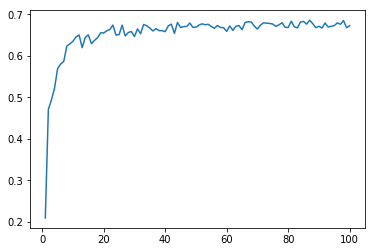

In [46]:
plt.plot(estimators, results)